# Project description

This project corresponds to the development of a machine learning model for the prediction of credit scores, produced as the final assignment for the Machine Learning course at Nova SBE during the sprong semester of 2025.

Collaborators of this project are:
- Luis Silva (43055)
- Martin Hunger (65604)
- Mikel Irizar (63619)

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import difflib


In [2]:
# Had to "pip install openpyxl"

dataset = pd.read_excel("pr11_credit_scores.xlsx")


In [3]:
dataset.info()

# The fact that we have some variables as objects, when they should be strings or numbers, points us to the fact that there are sveral data types mixed together (which should not happen) and alter us to data cleaningdataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       99909 non-null   object 
 5   SSN                       99909 non-null   object 
 6   Occupation                99909 non-null   object 
 7   Annual_Income             99909 non-null   object 
 8   Monthly_Inhand_Salary     84920 non-null   float64
 9   Num_Bank_Accounts         99909 non-null   float64
 10  Num_Credit_Card           99909 non-null   float64
 11  Interest_Rate             99909 non-null   float64
 12  Num_of_Loan               99909 non-null   object 
 13  Type_of_Loan              88509 non-null   ob

In [4]:
dataset.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,99909.0,99909,99909,99909,84920.000000,99909.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,44,10139,1799.0,12501,31,18936,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,13,98792,3
top,0x1602,CUS_0xd40,August,Langep,38.0,#F%$D@*&8,_______,17273.83,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12384,44,2831.0,5565,7055,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25487,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.071131,17.104395,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.605038,117.454091,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.597917,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)
dataset.head(24)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [6]:
# This function would be used to identify incorrect values in numerical columns

def is_numeric(x):
    try:
        float(x)
        return True
    except:
        return False

In [7]:
# After manually inspecting each of the columns, we realize that there are variables that should be numerical and are not being signalled as so due to the fact that there is wrongly-entered data in it. Even when the data is of the correct type (numerical or categorical), it could make no sense in our context.

# We start by signalling which variables should be categorical and which should be numerical

categorical_variables = ["ID", "Customer_ID", "Month", "Name", "SSN", "Occupation", "Type_of_Loan", "Credit_Mix", "Credit_History_Age", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]
numerical_variables = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

numerical_evaluate_further = []
categorical_evaluate_further = []

for column in dataset.columns:
    print(f'Analyzing column {column}')

    if column in numerical_variables: # Evaluating numerical variables

        if dataset[column].dtype not in ["float64", "int64"]: # Evaluating numeric with wrong datatype
            dataset['is_numeric'] = dataset[column].apply(is_numeric)
            invalid_values = dataset[dataset["is_numeric"] == False][column].value_counts()
            print(f'''{column} does not seem to be read as the data type that corresponds to it. 
                It has {invalid_values.shape[0]} invalid values. There are {invalid_values.nunique()} unqiue invalid values.
                The 5 most common being: {invalid_values.head(5)}
                The 5 least common being: {invalid_values.tail(5)}''')
            numerical_evaluate_further.append(column)
            
        elif dataset[column].isnull().sum() > 0: # Evaluating numeric with correct data type but missings
            print(f'Column {column} has the correct datatype and has {dataset[column].isnull().sum()} ({(dataset[column].isnull().sum()/dataset[column].shape[0])*100:.2f}%) missing values')

        else: # Evaluating those that apparently don't have a problem at first sight
            print(f'Column {column} seems to be ok')

    else:
        print(f'{column} has {dataset[column].nunique()} unique values')
        print(f'{column} has {dataset[column].isnull().sum()} missings')
        if dataset[column].nunique() > 20 or (dataset[column].isnull().sum()/dataset[column].shape[0]) > 0.01:
            categorical_evaluate_further.append(column)
            print(dataset[column].value_counts().head(5))
            print(dataset[column].value_counts().tail(5))

dataset.drop('is_numeric', axis=1, inplace=True)

            

Analyzing column ID
ID has 100000 unique values
ID has 0 missings
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
Name: count, dtype: int64
ID
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, dtype: int64
Analyzing column Customer_ID
Customer_ID has 12500 unique values
Customer_ID has 0 missings
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
Name: count, dtype: int64
Customer_ID
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, dtype: int64
Analyzing column Month
Month has 44 unique values
Month has 0 missings
Month
August      12384
February    12376
May         12375
March       12373
April       12372
Name: count, dtype: int64
Month
MarcE      1
ADgust     1
Say        1
Marcm      1
Jonuary    1
Name: count, dtype: int64
Analyzing column Name
Name has 10139 unique values
Name has 9985 missings
Name
Langep      44
Stevex      44
Vaughanl    39
Jess

# Data Cleaning

## Initial data cleaning

The piece of code actually highlights some useful things, which would be the basis for our initial data cleaning:
- For numerical values that do not have a numerical data type associated, it seems that the main problem cauising this is the trailing underscore.
- There are a fair quantity of numerical variables that are indeed classified as numerical data types, but have missings
- There are a few numerical variables that do not face data type or missings problems, thus they can be ready for the next step of data evaluation.
- Most categorical variables can be evaluated with a bar chart
- Most categorical variables do not have many missings

In [23]:
# We see that trailing underscores are a common issue across variables, disregarding whether they are numercial or categorical. Additionally, there's only two variables that are meant ot have underscores. We will trim trailing underscores to salvage numerical data. We will do this by converting the variables to string, cleaning the underscores, and converting back to numerical. Those values that do not correspond to numerical will be converted to missing values. In the case of categocial values, we will just remove the trailing underscores. For the categorical values, we noticed tat some differences in value fo features can be reducedby turnin everything to lower case or upper case, so we will do this as well.

variables_allow_underscore = ["Customer_ID", "Payment_Behaviour"]

for variable in dataset.columns:
    if variable not in variables_allow_underscore:
        dataset[variable] = dataset[variable].astype(str).str.replace("_", "", regex=False)
    if variable in numerical_variables:
        dataset[variable] = pd.to_numeric(dataset[variable], errors='coerce')
    if variable in categorical_variables:
        dataset[variable] = dataset[variable].astype(str).str.lower()
        dataset[variable] = dataset[variable].replace("", pd.NA) #avoid empty strings and substitute them for missing values instead


dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/3314124087.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


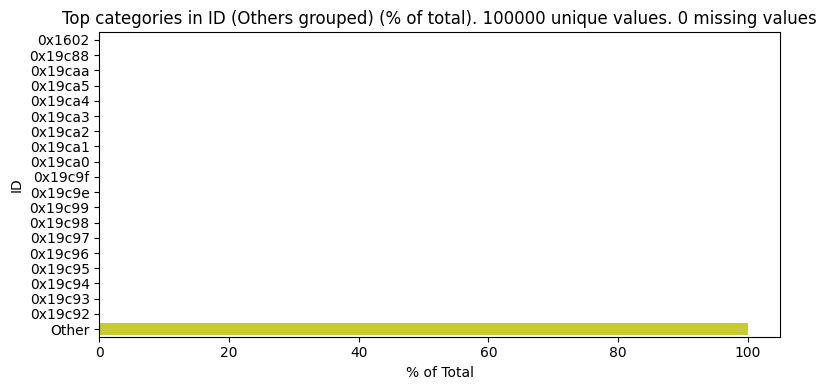

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/3314124087.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


KeyboardInterrupt: 

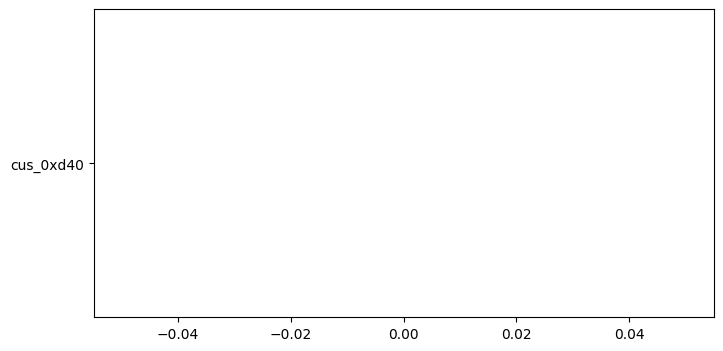

In [24]:
# With the data with correct data types and with some cleaning having started, we can start visualizing the variables
for variable in dataset.columns:
    plt.figure(figsize=(8, 4))

    num_unique = dataset[variable].nunique()
    num_missing = dataset[variable].isnull().sum()

    if variable in numerical_variables: # Numerical variables

        summary_stats = dataset[variable].describe(percentiles=[0.95, 0.99]).transpose()
        mean = summary_stats['mean']
        p95 = summary_stats['95%']
        p99 = summary_stats['99%']

        sns.histplot(dataset[variable], bins=30)
        plt.axvline(mean, color='red', linestyle='--', label='Mean')
        plt.axvline(p95, color='orange', linestyle='--', label='95th Percentile')
        plt.axvline(p99, color='green', linestyle='--', label='99th Percentile')

        plt.title(f'Distribution of {variable}. {num_unique} unique values. {num_missing} missing values')
        plt.xlabel(variable)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

    elif variable in categorical_variables and dataset[variable].nunique() <= 20:
        value_counts = dataset[variable].value_counts(normalize=True) * 100
        sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')
        plt.title(f'Top categories in {variable} (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)

    elif variable in categorical_variables:
        # Calculate percentage distribution for all categories
        value_counts = dataset[variable].value_counts(normalize=True) * 100
        top_19 = value_counts.head(19)
        other = value_counts[19:].sum()
        value_counts_plot = pd.concat([top_19, pd.Series({'Other': other})])

        sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')
        plt.title(f'Top categories in {variable} (Others grouped) (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)


    plt.tight_layout()
    plt.show()


From the graphs above, it is clear that there are variables that are meant to contain unique values, numerical variables with clear outliers that likely correspond to faulty data entry, fallback values in both categorical and numerical values, etc. Some of these data-related issues can be managed by: (a) applying business logic rules (e.g. annual income cannot be negative), (b) following dataset logic (e.g. it's alright fro the customer's age to change once, but it cannot change twice in the period of 8 moths), (c) following customer logic (e.g. ensuring name is consistent across customer)

For cleaning the data in a more modular way, allowing the usage of cleaner and simpler code, we though of the following data cleaning logic:

![Alt Text](data_cleaning_logic.png)

For this, we would need to define several functions that treat the data and specify for which variables those transformations would apply. We tried writing functions as simple as possible so that they adapt to several types of variables. We start by defining the functions:

In [10]:
def correct_month(month_str):
    # Define the canonical month names.
    canonical_months = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    # Clean the input string.
    candidate = month_str.strip().lower()
    
    # Find the closest match (using a cutoff for similarity).
    matches = difflib.get_close_matches(candidate, [m.lower() for m in canonical_months], n=1, cutoff=0.6)
    
    if matches:
        # Return the canonical name matching the found close match.
        for m in canonical_months:
            if m.lower() == matches[0]:
                return m
    else:
        # Fallback: return the original string capitalized.
        return month_str.capitalize()

# Apply the correction function to the "Month" column directly.
dataset["Month"] = dataset["Month"].apply(correct_month)

In [11]:
# Converting credit_history_age to months

def extract_months(value):
    if pd.isna(value):
        return np.nan
    numbers = re.findall(r'\d+', value)
    if not numbers:
        return np.nan
    years = int(numbers[0]) if len(numbers) > 0 else 0
    months = int(numbers[1]) if len(numbers) > 1 else 0
    return years * 12 + months


dataset['Credit_History_Age'] = dataset['Credit_History_Age'].apply(extract_months)

In [12]:
def replace_fallbacks_with_nan(df, target_col):

    fallbacks = {"nan", "#f%$d@*&8", "!@9#%8"}
    
    df[target_col] = df[target_col].apply(
        lambda x: pd.NA if pd.notna(x) and str(x) in fallbacks else x
    )
    
    return df

In [13]:
def business_logic_limits(df, column, lower_limit, upper_limit):
    """
    Replace values below lower_limit with NaN and values above upper_limit with NaN.
    
    Parameters:
    - df: DataFrame containing the data
    - column: The column name where outliers should be replaced with NaN
    - lower_limit: The minimum allowed value for the column
    - upper_limit: The maximum allowed value for the column
    
    Returns:
    - DataFrame with outliers replaced by NaN
    """
    # Replace values below the lower limit with NaN
    df[column] = df[column].apply(lambda x: np.nan if x < lower_limit else x)
    
    # Replace values above the upper limit with NaN
    df[column] = df[column].apply(lambda x: np.nan if x > upper_limit else x)
    
    return df


In [14]:
def fill_most_frequent_value(df, group_col, target_col):
    """
    Replaces each value in the target_col with the most frequent non-null value per group_col.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        group_col (str): Column name to group by (e.g., 'Customer_ID').
        target_col (str): Column name whose values will be replaced.

    Returns:
        pd.DataFrame: A copy of the original DataFrame with target_col cleaned.
    """
    # Step 1: Define function to get the most frequent non-null value
    def most_frequent(series):
        return series.dropna().value_counts().idxmax() if not series.dropna().empty else None

    # Step 2: Map most frequent value per group
    most_common_values = df.groupby(group_col)[target_col].apply(most_frequent)

    # Step 3: Map those values back to the DataFrame
    df[target_col] = df[group_col].map(most_common_values)

    return df


In [15]:
def create_sequential_values(df, group_col, target_col):
    """
    Creates a sequential series of values based on the first non-NA value in each group.
    The sequence counts backwards before the first non-NA value and forwards after it.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        group_col (str): Column name to group by
        target_col (str): Column name containing values to sequence
    
    Returns:
        pd.DataFrame: DataFrame with new sequential values
    """
    
    for _, group in df.groupby(group_col):
        idx = group.index
        values = group[target_col].tolist()
        
        # Find index and value of first non-NA
        first_non_na_idx = None
        first_non_na_val = None
        
        for i, val in enumerate(values):
            if pd.notna(val):
                first_non_na_idx = i
                first_non_na_val = val
                break
        
        # Generate sequential values
        if first_non_na_val is not None:
            # Calculate the starting point (first_non_na_val - first_non_na_idx)
            start_value = first_non_na_val - first_non_na_idx
            cleaned_values = [start_value + i for i in range(len(values))]
        else:
            # If all NAs, leave as is (or could fill with another logic)
            cleaned_values = values
        
        # Update the DataFrame
        df.loc[idx, target_col] = cleaned_values
    
    return df

In [16]:
def sequences_with_one_change(df, group_col, target_col):
    """
    Cleans a column with at most two logical stages per group, preserving row order.
    """
        
    # Group by group_col and iterate over each group
    for _, group in df.groupby(group_col):
        # Get indices of the current group
        idx = group.index
        # Extract the target_col values for the group
        values = group[target_col].tolist()
        
        # Find first and second unique non-NA values
        first_value = None
        second_value = None
        split_idx = len(values)
        
        for i, val in enumerate(values):
            if pd.notna(val):
                if first_value is None:
                    first_value = val
                elif val != first_value and second_value is None:
                    second_value = val
                    split_idx = i
                    break  # Stop after finding the second value
        
        # Fill NAs in the group
        cleaned_values = []
        for i, val in enumerate(values):
            if pd.isna(val):
                if i < split_idx:
                    cleaned_values.append(first_value)
                else:
                    cleaned_values.append(second_value if second_value is not None else first_value)
            else:
                cleaned_values.append(val)
        
        # Update the DataFrame in place for the current group's indices
        df.loc[idx, target_col] = cleaned_values
    
    return df

In [17]:
def substitute_by_logical_value(df, group_col, target_col):
    """
    Simplified version that handles pd.NA comparisons correctly
    """
    
    for _, group in df.groupby(group_col):
        idx = group.index
        vals = group[target_col].tolist()
        cleaned = vals.copy()
        
        # Forward fill for first NAs
        for i in range(len(vals)):
            if pd.isna(cleaned[i]):
                # Find next non-NA
                for j in range(i+1, len(vals)):
                    if pd.notna(vals[j]):
                        cleaned[i] = vals[j]
                        break
        
        # Backward fill for remaining NAs with logic
        for i in range(len(vals)):
            if pd.isna(cleaned[i]):
                prev = cleaned[i-1] if i > 0 else None
                next_val = cleaned[i+1] if i < len(vals)-1 else None
                
                # Safe comparison that handles pd.NA
                if (pd.notna(next_val) and pd.notna(prev) and prev == next_val):
                    cleaned[i] = prev
                elif pd.notna(prev):  # Default to previous if exists
                    cleaned[i] = prev
                # Else leave as NA if no previous value
        
        df.loc[idx, target_col] = cleaned
    
    return df

In [18]:
def winsorize_by_iqr(df, column, lower_threshold_factor=3, upper_threshold_factor=3):
    """
    Apply winsorization to a column in the DataFrame based on the IQR (Interquartile Range) method.
    Values below the lower threshold are replaced by the lower threshold and values above the upper
    threshold are replaced by the upper threshold.
    
    Parameters:
    - df: DataFrame containing the data.
    - column: The column name to apply winsorization on.
    - lower_threshold_factor: The factor to calculate the lower threshold. Default is 1.5 (commonly used).
    - upper_threshold_factor: The factor to calculate the upper threshold. Default is 1.5 (commonly used).
    
    Returns:
    - df: DataFrame with winsorized values.
    """
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    p95 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds based on the IQR method
    lower_bound = Q1 - lower_threshold_factor * IQR
    upper_bound = min(p95, Q3 + upper_threshold_factor * IQR)
    
    # Apply winsorization: cap values that are below the lower bound or above the upper bound
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

In [19]:
def dealing_missing_values(df, group, target):

    if df[target].dtype in ["float64", "int64"]:
        # Numeric imputation (median)
        df[target] = df.groupby(group)[target].transform(
            lambda x: x.fillna(x.median()) if not x.isnull().all() else x
        )
    else:
        # Categorical imputation (mode) - corrected
        def fill_with_mode(x):
            modes = x.mode()
            return x.fillna(modes[0]) if not modes.empty else x
        
        df[target] = df.groupby(group)[target].transform(fill_with_mode)
    
    return df

We now define a disctionary that will contain, by variable, the transformations and parameters to apply.

In [20]:
cleaning_rules = {
    "ID": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": True,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Customer_ID": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": True,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Month": {
        "is_numeric": False,
        "business_logic": True,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Name": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": True,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Age": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 100,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": True,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "SSN": {
        "is_numeric": False,
        "business_logic": True,
        "all_values_unique": True,
        "single_value_per_customer": True,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Occupation": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": False,
    },
    "Annual_Income": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 10000000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "logical_value_substitution": True,
        "sequence_by_step": False,
        "nonsense_outliers": True,
    },
    "Monthly_Inhand_Salary": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 1000000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": True,
    },
    "Num_Bank_Accounts": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 30,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": True,
    },
    "Num_Credit_Card": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 30,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": True,
    },
    "Interest_Rate": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 100,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Num_of_Loan": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 30,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": True,
    },
    "Type_of_Loan": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Delay_from_due_date": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 365,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Num_of_Delayed_Payment": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 100,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Changed_Credit_Limit": {
        "is_numeric": True,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Num_Credit_Inquiries": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 100,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": True,
        "nonsense_outliers": True,
    },
    "Credit_Mix": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Outstanding_Debt": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 1000000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Credit_Utilization_Ratio": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0.0,
        "business_logic_max": 100,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Credit_History_Age": {
        "is_numeric": True,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_value_filling": None,
        "single_change": False,
        "sequence_by_step": True,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Payment_of_Min_Amount": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Total_EMI_per_month": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 200000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Amount_invested_monthly": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 100000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Payment_Behaviour": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    },
    "Monthly_Balance": {
        "is_numeric": True,
        "business_logic": True,
        "business_logic_min": 0,
        "business_logic_max": 1000000,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": True,
    },
    "Credit_Score": {
        "is_numeric": False,
        "business_logic": False,
        "all_values_unique": False,
        "single_value_per_customer": False,
        "single_change": False,
        "sequence_by_step": False,
        "logical_value_substitution": False,
        "nonsense_outliers": False,
    }
}


In [21]:
# Loop for cleaning data
for variable in dataset.columns:

    replace_fallbacks_with_nan(dataset, variable)

    if cleaning_rules[variable]["is_numeric"]:
        if cleaning_rules[variable]["business_logic"]:
            business_logic_limits(dataset, variable, cleaning_rules[variable]["business_logic_min"], cleaning_rules[variable]["business_logic_max"])

    if cleaning_rules[variable]["single_value_per_customer"]:
        fill_most_frequent_value(dataset, "Customer_ID", variable)
        
    if cleaning_rules[variable]["single_change"]:
        sequences_with_one_change(dataset, "Customer_ID", variable)

    if cleaning_rules[variable]["sequence_by_step"]:
        create_sequential_values(dataset, "Customer_ID", variable)

    if cleaning_rules[variable]["logical_value_substitution"]:
        substitute_by_logical_value(dataset, "Customer_ID", variable)

    if cleaning_rules[variable]["nonsense_outliers"]:
        winsorize_by_iqr(dataset, variable)

    dealing_missing_values(dataset, "Customer_ID", variable)

    

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


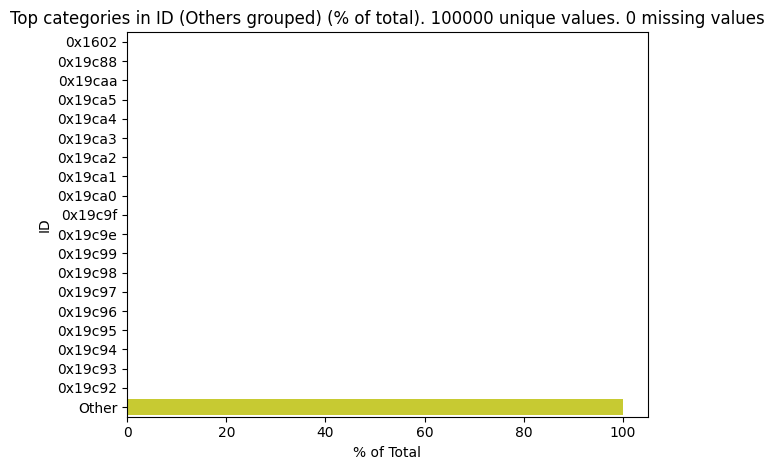

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


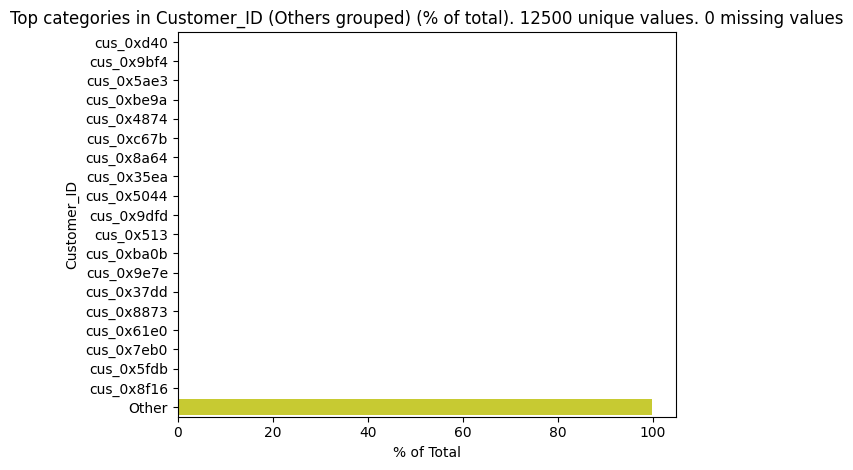

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


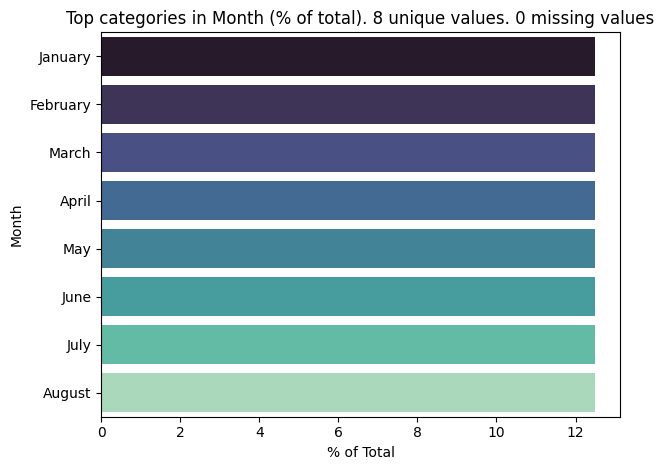

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


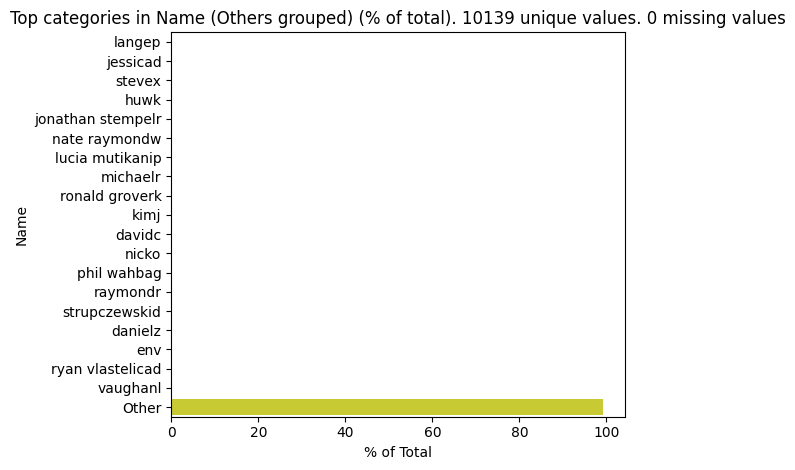

count    100000.00000
mean         33.21254
std          10.58260
min          14.00000
50%          33.00000
95%          52.00000
99%          52.00000
max          52.00000
Name: Age, dtype: float64


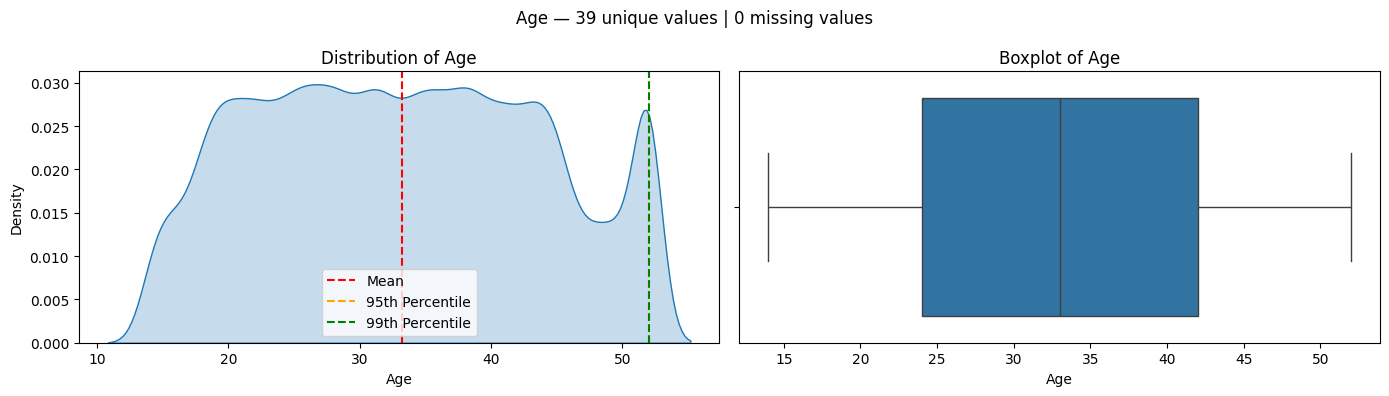

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


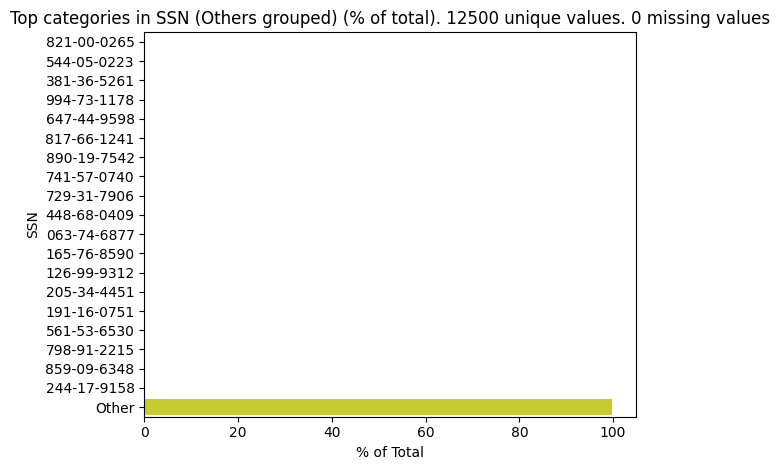

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


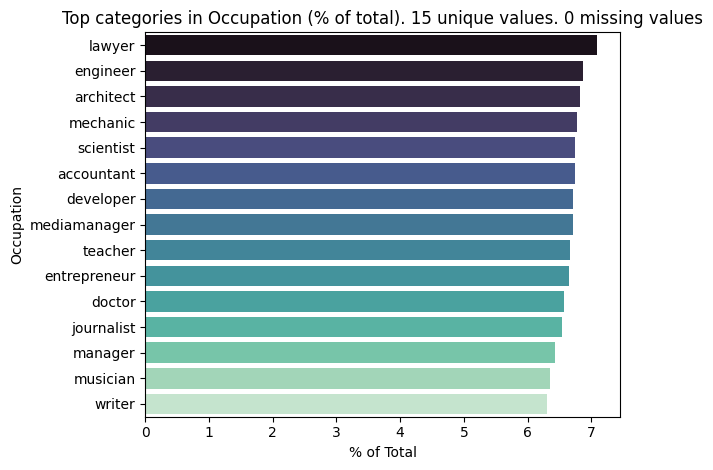

count    100000.000000
mean      49925.128119
std       36255.315463
min        7005.930000
50%       37233.500000
95%      131990.840000
99%      131990.840000
max      131990.840000
Name: Annual_Income, dtype: float64


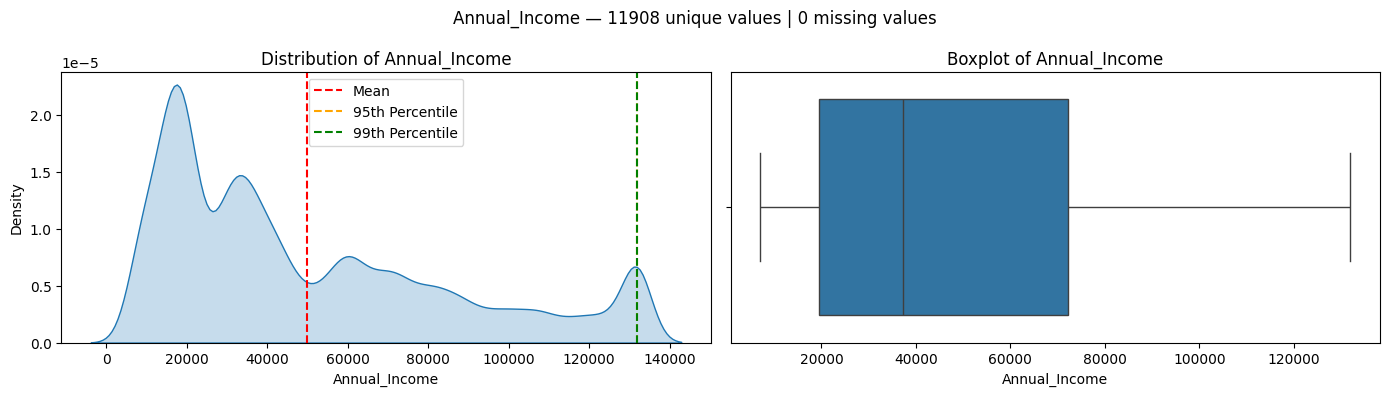

count    100000.000000
mean       4117.001548
std        2976.998077
min         303.645417
50%        3096.378333
95%       10834.460000
99%       10834.460000
max       10834.460000
Name: Monthly_Inhand_Salary, dtype: float64


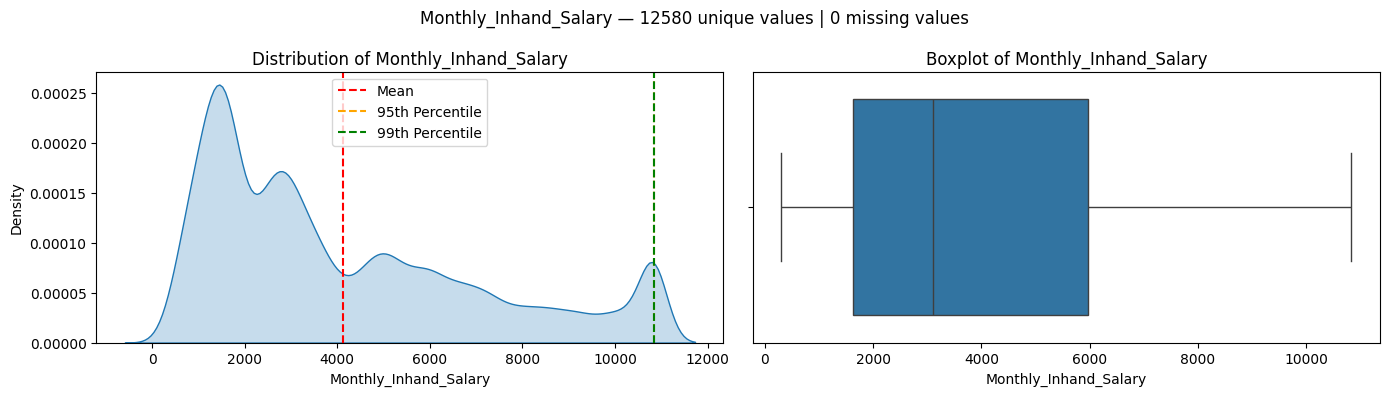

count    100000.000000
mean          5.369050
std           2.593334
min           0.000000
50%           5.000000
95%          10.000000
99%          10.000000
max          10.000000
Name: Num_Bank_Accounts, dtype: float64


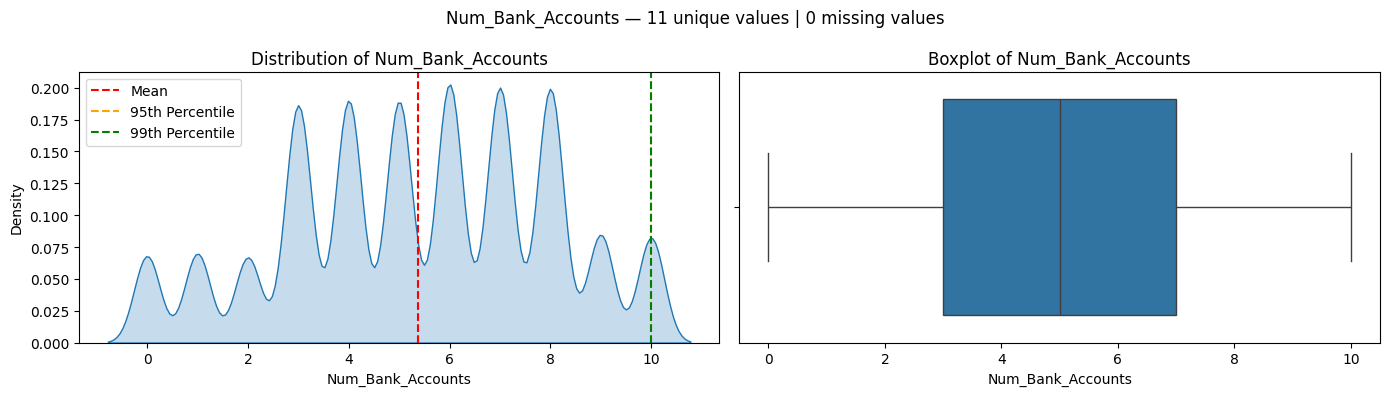

count    100000.000000
mean          5.534300
std           2.067198
min           0.000000
50%           5.000000
95%          10.000000
99%          10.000000
max          10.000000
Name: Num_Credit_Card, dtype: float64


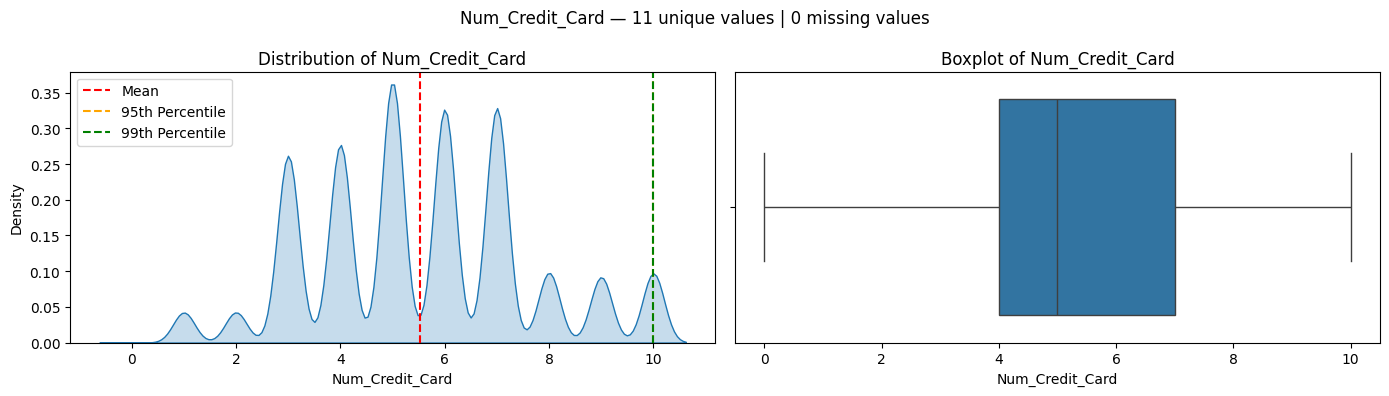

count    100000.000000
mean         14.442070
std           8.552636
min           1.000000
50%          13.000000
95%          31.000000
99%          31.000000
max          31.000000
Name: Interest_Rate, dtype: float64


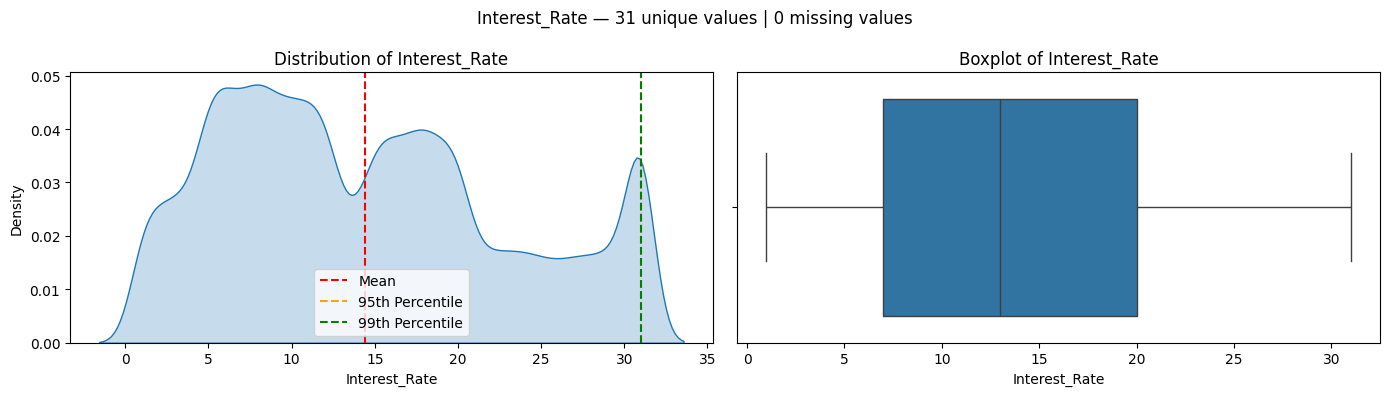

count    100000.000000
mean          3.494680
std           2.366666
min           0.000000
50%           3.000000
95%           8.000000
99%           8.000000
max           8.000000
Name: Num_of_Loan, dtype: float64


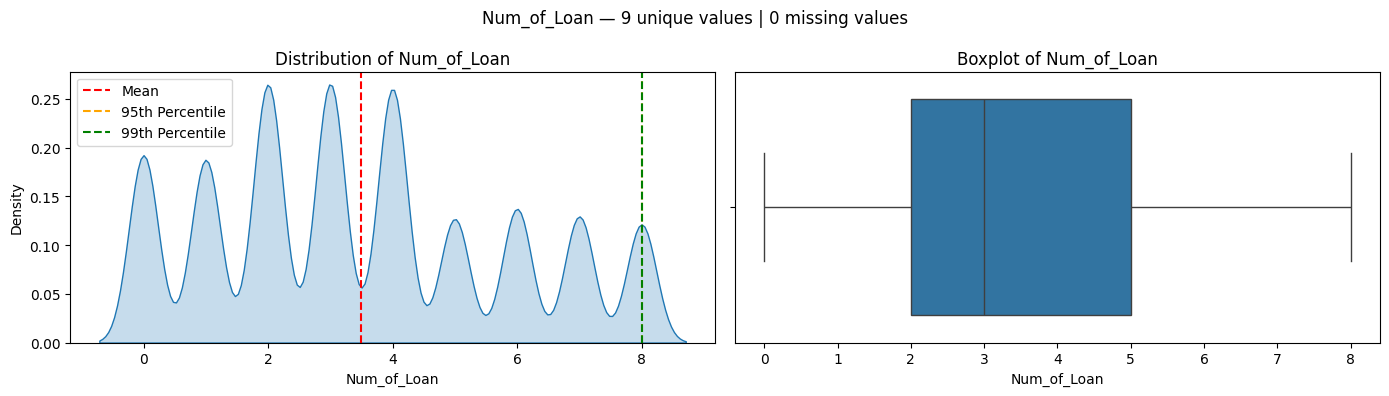

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')


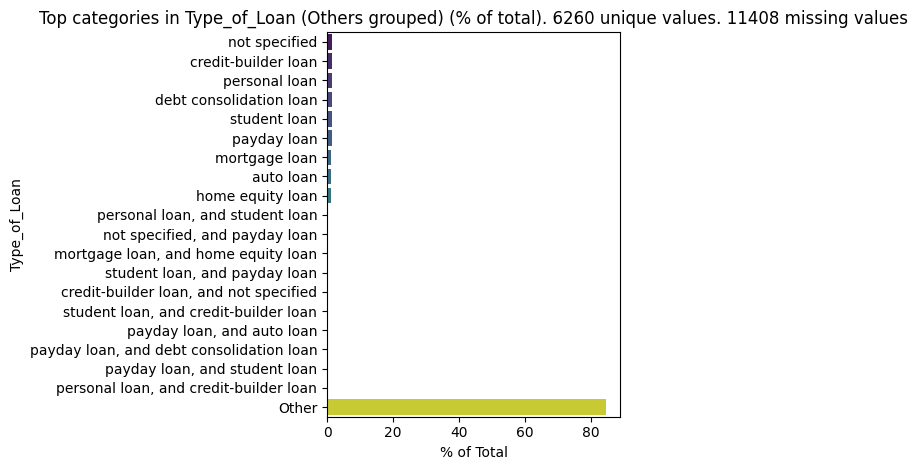

count    100000.00000
mean         20.87262
std          14.28844
min           0.00000
50%          18.00000
95%          54.00000
99%          54.00000
max          54.00000
Name: Delay_from_due_date, dtype: float64


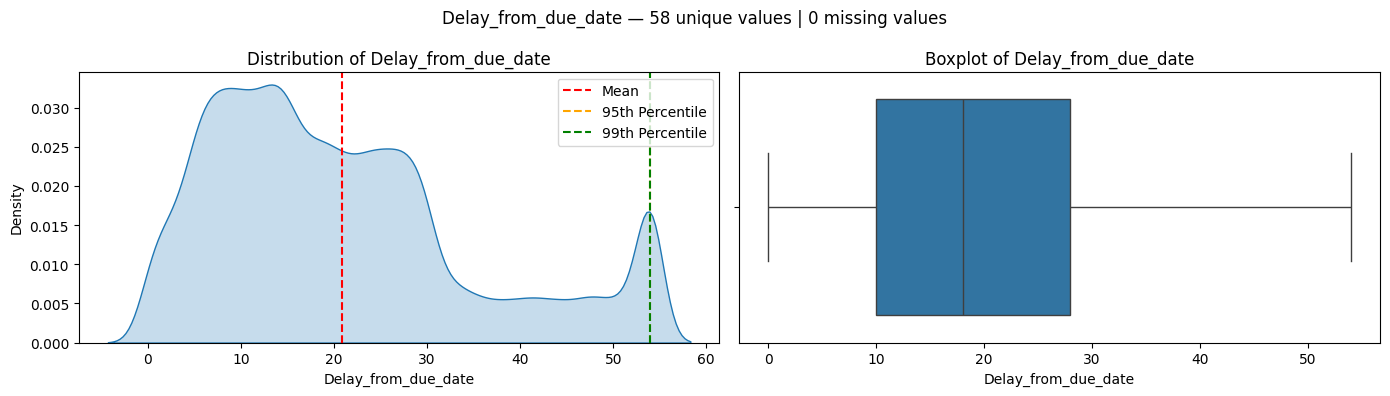

count    100000.000000
mean         13.251040
std           6.124507
min           0.000000
50%          14.000000
95%          23.000000
99%          23.000000
max          23.000000
Name: Num_of_Delayed_Payment, dtype: float64


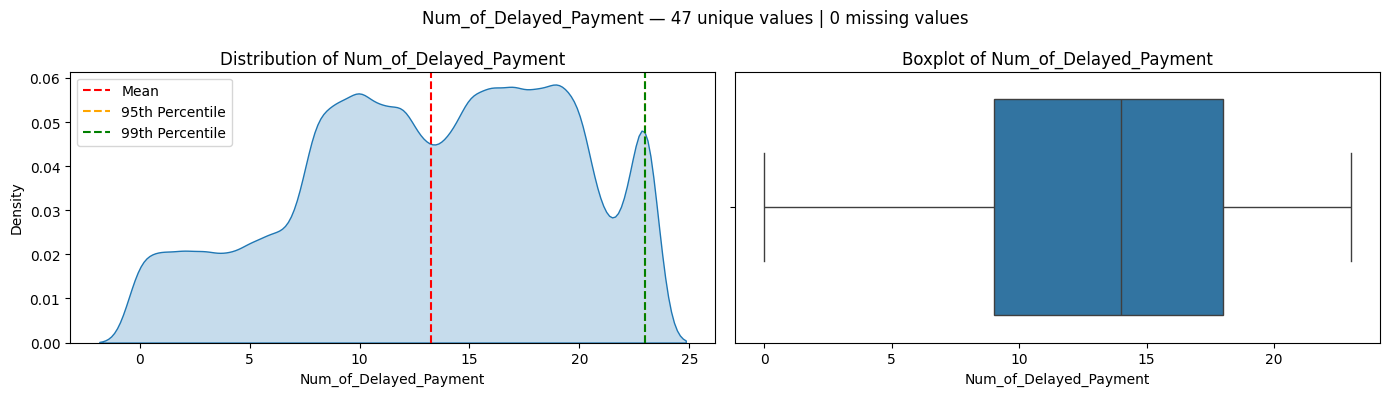

count    100000.000000
mean         10.389113
std           6.783421
min          -6.490000
50%           9.400000
95%          23.600000
99%          28.810000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64


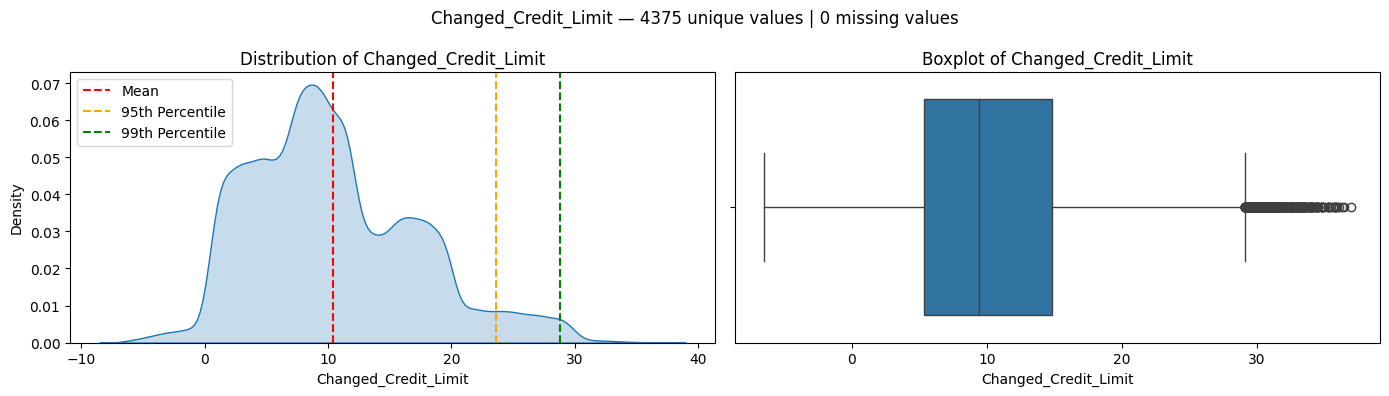

count    100000.000000
mean          5.692470
std           3.666714
min           0.000000
50%           5.000000
95%          12.000000
99%          12.000000
max          12.000000
Name: Num_Credit_Inquiries, dtype: float64


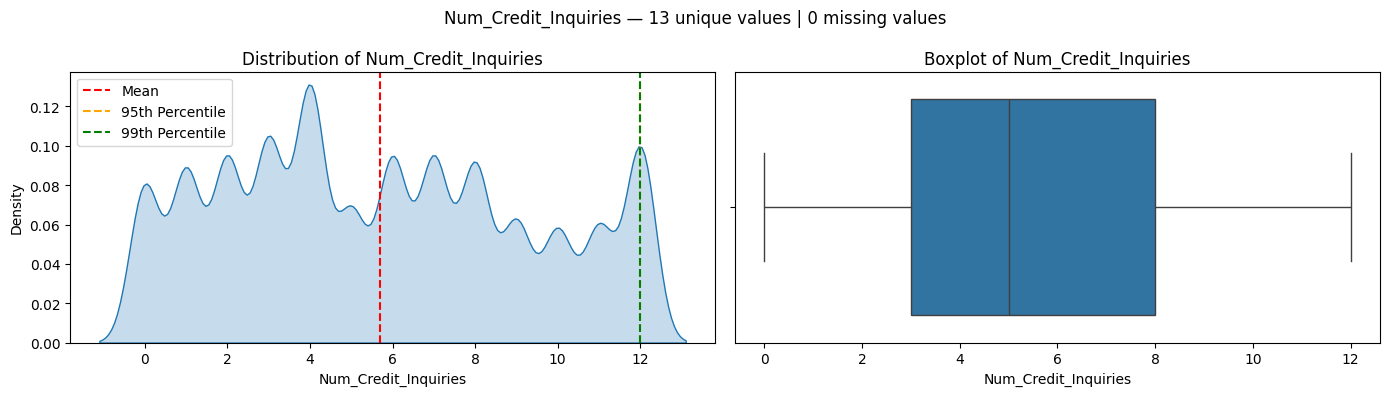

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


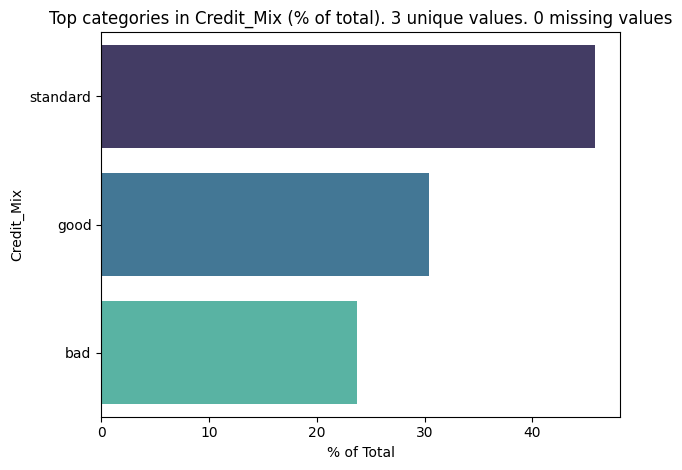

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
50%        1166.155000
95%        4073.760500
99%        4806.966900
max        4998.070000
Name: Outstanding_Debt, dtype: float64


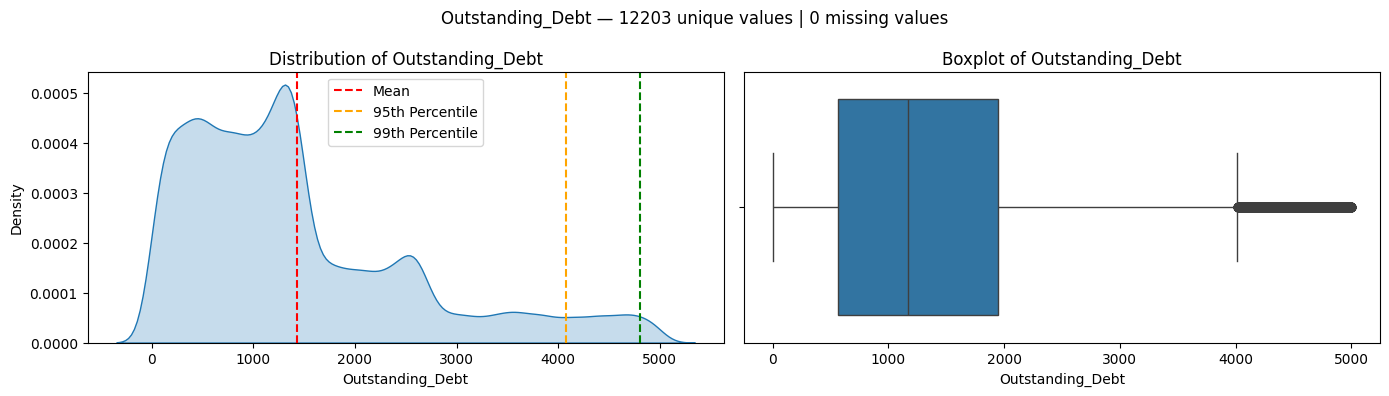

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
50%          32.305784
95%          40.220207
99%          42.450965
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


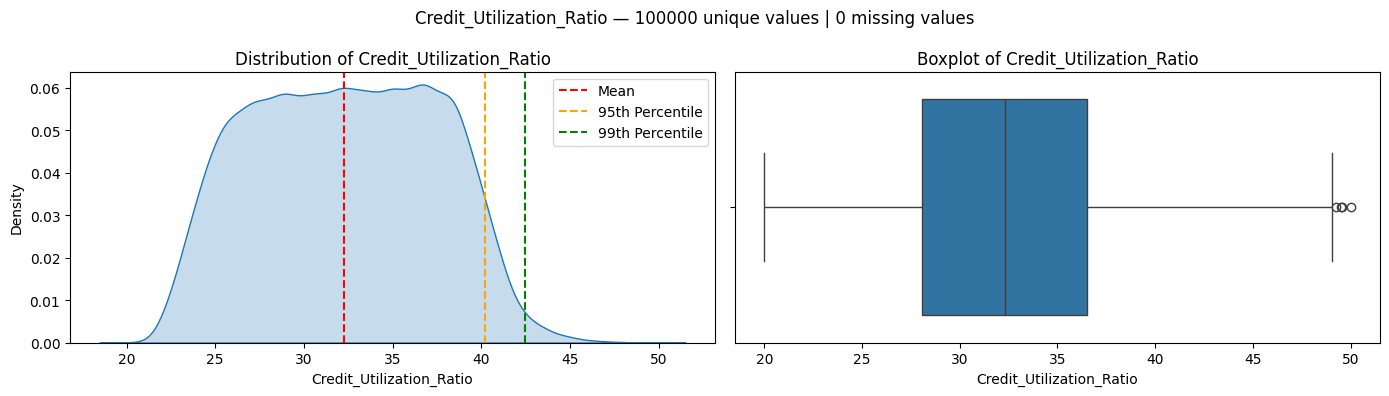

count    100000.000000
mean        221.206880
std          99.681112
min           1.000000
50%         219.000000
95%         381.000000
99%         396.000000
max         404.000000
Name: Credit_History_Age, dtype: float64


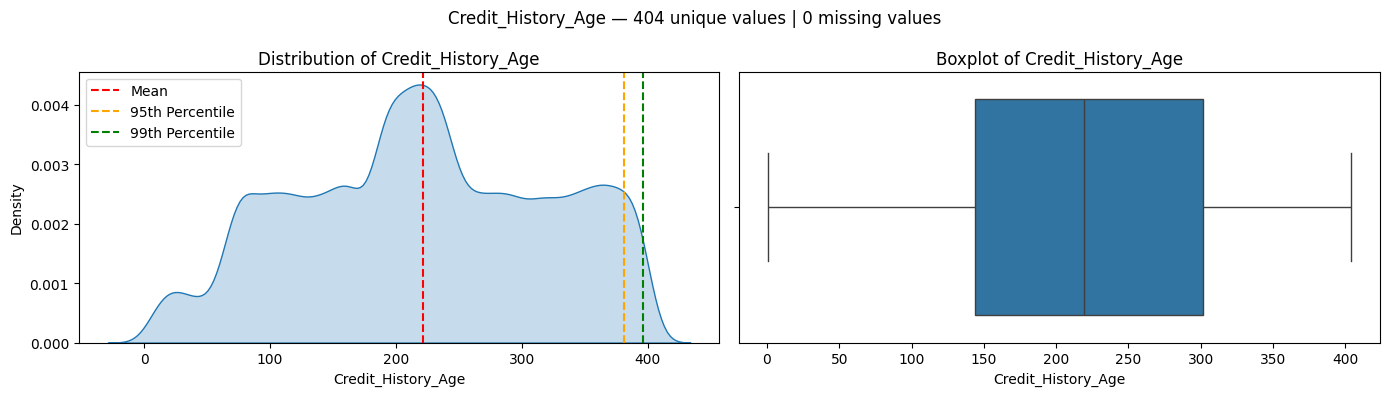

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


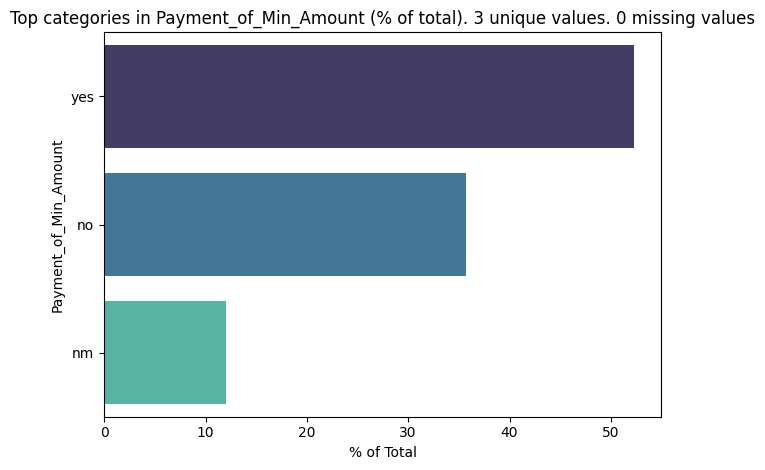

count    100000.000000
mean        112.626724
std         116.328359
min           0.000000
50%          69.249473
95%         437.012753
99%         437.012753
max         437.012753
Name: Total_EMI_per_month, dtype: float64


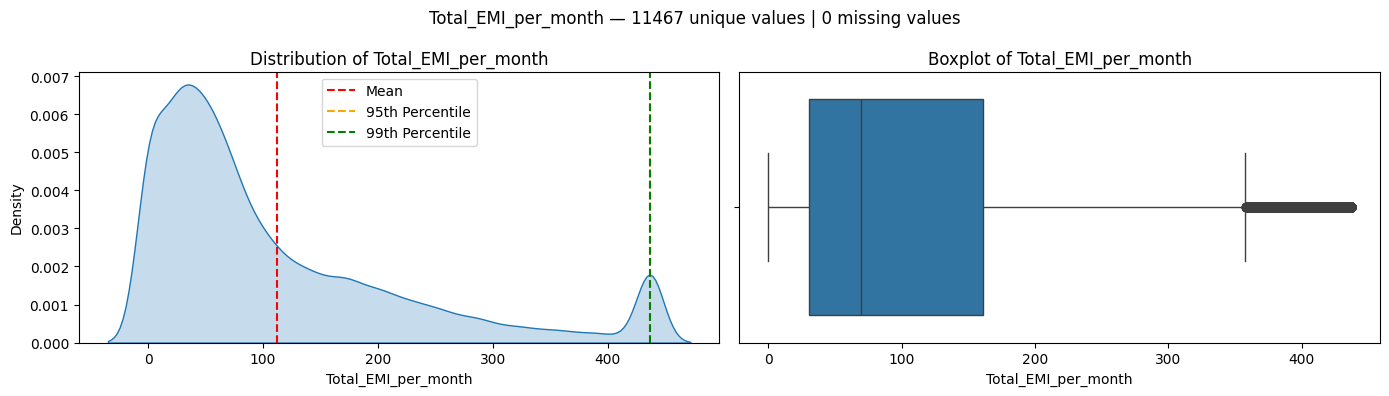

count    100000.000000
mean        218.794299
std         218.674504
min           0.000000
50%         136.173912
95%         839.324927
99%         839.324927
max         839.324927
Name: Amount_invested_monthly, dtype: float64


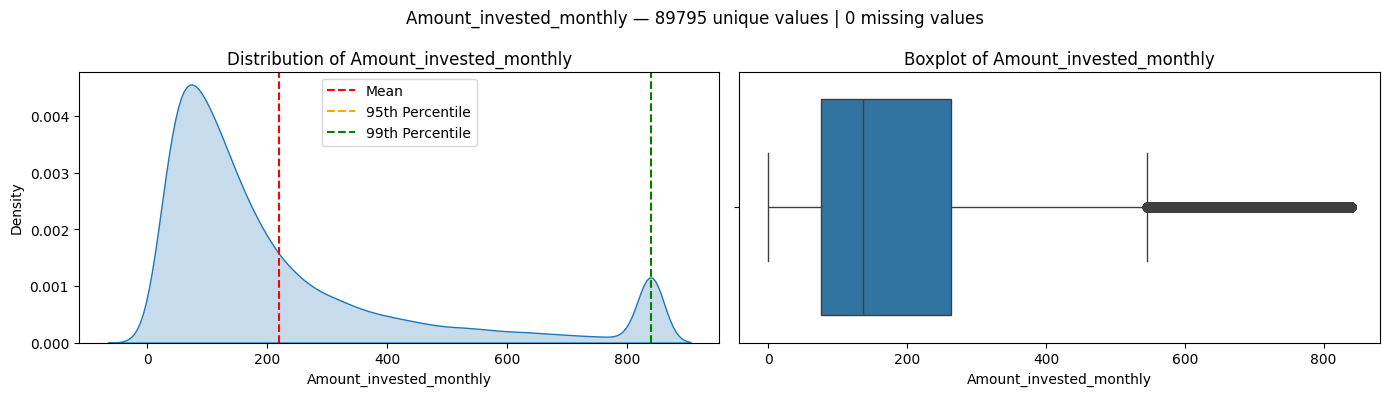

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


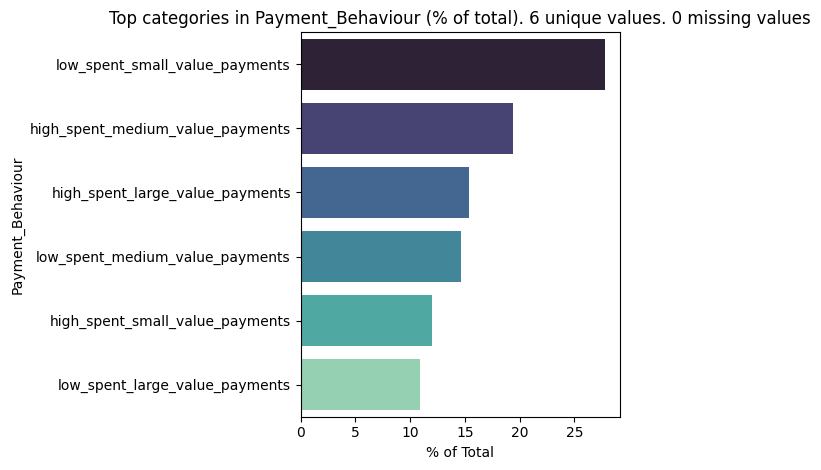

count    100000.000000
mean        395.046295
std         189.132509
min           0.007760
50%         337.270985
95%         862.599060
99%         862.599060
max         862.599060
Name: Monthly_Balance, dtype: float64


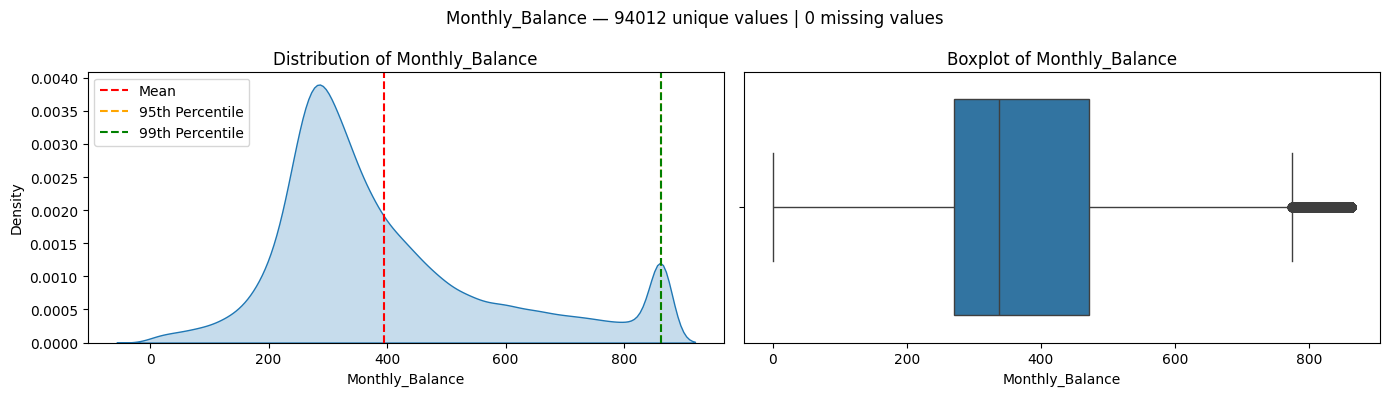

/var/folders/68/7w1qp8xs3b90k8m8trbrtb280000gn/T/ipykernel_96205/2907494033.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')


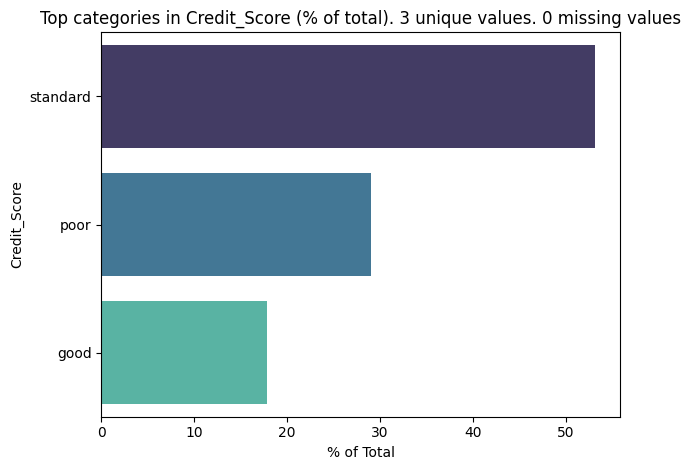

In [22]:
# With the data with correct data types and with some cleaning having started, we can start visualizing the variables

for variable in dataset.columns:

    num_unique = dataset[variable].nunique()
    num_missing = dataset[variable].isnull().sum()

    if cleaning_rules[variable]["is_numeric"]:
        summary_stats = dataset[variable].describe(percentiles=[0.95, 0.99]).transpose()
        print(summary_stats)
        mean = summary_stats['mean']
        p95 = summary_stats['95%']
        p99 = summary_stats['99%']

        fig, axes = plt.subplots(1, 2, figsize=(14, 4))

        sns.kdeplot(data=dataset, x=variable, ax=axes[0], fill=True)
        axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
        axes[0].axvline(p95, color='orange', linestyle='--', label='95th Percentile')
        axes[0].axvline(p99, color='green', linestyle='--', label='99th Percentile')
        axes[0].set_title(f'Distribution of {variable}')
        axes[0].set_xlabel(variable)
        axes[0].set_ylabel('Density')
        axes[0].legend()

        # Boxplot
        sns.boxplot(data=dataset, x=variable, ax=axes[1], orient='h')
        axes[1].set_title(f'Boxplot of {variable}')
        axes[1].set_xlabel(variable)

        fig.suptitle(f'{variable} — {num_unique} unique values | {num_missing} missing values', fontsize=12)
        plt.tight_layout()
        plt.show()


    elif cleaning_rules[variable]["is_numeric"] == False and dataset[variable].nunique() <= 20:
        value_counts = dataset[variable].dropna().value_counts(normalize=True) * 100
        sns.barplot(x=value_counts.values, y=value_counts.index, palette='mako')
        plt.title(f'Top categories in {variable} (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()

    elif cleaning_rules[variable]["is_numeric"] == False:
        # Calculate percentage distribution for all categories
        value_counts = dataset[variable].dropna().value_counts(normalize=True) * 100
        top_19 = value_counts.head(19)
        other = value_counts[19:].sum()
        value_counts_plot = pd.concat([top_19, pd.Series({'Other': other})])

        sns.barplot(x=value_counts_plot.values, y=value_counts_plot.index, palette='viridis')
        plt.title(f'Top categories in {variable} (Others grouped) (% of total). {num_unique} unique values. {num_missing} missing values')
        plt.xlabel('% of Total')
        plt.ylabel(variable)
        plt.tight_layout()
        plt.show()


# Feature engineering
Creating good features is probably the most important step in the machine learning process. 
This might involve doing:
- transformations
- aggregating over data points or over time and space, or finding differences (for example: differences between two monthly bills, time difference between two contacts with the client) 
- creating dummy (binary) variables
- discretization

Business insight is very relevant in this process. If it is possible you can also find additional relevant data.

In [ ]:
# Debt-to-Income
dataset['DTI'] = dataset['Outstanding_Debt'] / dataset['Annual_Income']

# EMI-to-Income
dataset['EMI_Ratio'] = dataset['Total_EMI_per_month'] / dataset['Monthly_Inhand_Salary']

# ensure Month is datetime and sorted
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset = dataset.sort_values(['Customer_ID', 'Month'])

# 3-month rolling average of delayed payments
dataset['RollDelays_3'] = (
    dataset
      .groupby('Customer_ID')['Num_of_Delayed_Payment']
      .rolling(window=3, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

# Months since last delay
# 1) convert to month‐period
dataset['MonthPeriod'] = dataset['Month'].dt.to_period('M')

# 2) mark the last delay month per customer
last = (
    dataset
      .loc[dataset['Num_of_Delayed_Payment'] > 0]
      .groupby('Customer_ID')['MonthPeriod']
      .cummax()
)
dataset['LastDelayMonth'] = last.groupby(dataset['Customer_ID']).ffill()

# 3) difference in months
dataset['MonthsSinceLastDelay'] = (
    dataset['MonthPeriod']
      .sub(dataset['LastDelayMonth'])
      .apply(lambda x: x.n)
)

# log scaling for high numbers and absolute differences
dataset['log_OutDebt']    = np.log1p(dataset['Outstanding_Debt'])
dataset['log_AnnIncome']  = np.log1p(dataset['Annual_Income'])
dataset['log_EMI']        = np.log1p(dataset['Total_EMI_per_month'])


# one hot encoding. I would leave out Type of loan because we have so many different
cats = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
dataset = pd.get_dummies(dataset, columns=cats, drop_first=True)

# binning
# Age buckets
bins_age = [18, 25, 35, 50, dataset['Age'].max()]
labels_age = ['18-25','26-35','36-50','51+']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins_age, labels=labels_age)

# Income quartiles
dataset['Income_Quartile'] = pd.qcut(dataset['Annual_Income'], q=4, labels=False) + 1

# Credit history length
bins_hist = [0, 2, 5, dataset['Credit_History_Age'].max()]
labels_hist = ['Short','Medium','Long']
dataset['History_Length'] = pd.cut(dataset['Credit_History_Age'],
                                   bins=bins_hist, labels=labels_hist)


Leverage and Liquidity Ratios
To capture how indebted our borrowers are relative to their means, we computed two classic ratios: Debt-to-Income (DTI) and EMI-to-Income. DTI (Outstanding_Debt ÷ Annual_Income) measures the share of annual earnings required to retire existing balances, while EMI-to-Income (Total_EMI_per_month ÷ Monthly_Inhand_Salary) reflects the monthly repayment burden relative to net take-home pay. Both ratios are industry-standard indicators of whether a customer’s obligations remain sustainable or are approaching risky levels.

Repayment Behavior Trends
Rather than treating delays as isolated counts, we engineered a 3-month rolling average of delayed payments and a recency feature (months since last delay). The rolling average smooths out one-off anomalies and highlights borrowers with consistently late payments, whereas the recency metric flags whether their payment behavior is improving or deteriorating over time. Together, these features capture both the persistence of delinquency and its momentum.

Log-Transforms of Skewed Numerics
Key financial variables—outstanding debt, annual income, and total EMI—often exhibit heavy right-skew due to a small number of very large values. We applied a log(1 + x) transformation to create log_OutDebt, log_AnnIncome, and log_EMI. This approach compresses extreme outliers, stabilizes variance, and tends to linearize relationships with credit score, benefiting models that assume more normally distributed inputs or linear effects.

Categorical Encoding with Dummy Variables
For our categorical features (Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour), we used one-hot encoding—dropping one reference level per variable to avoid multicollinearity. This preserves any distinct risk patterns across loan types or payment behaviors by turning each category into its own binary indicator, allowing both tree-based and linear models to weight them independently.

Discretization (Binning) of Continuous Attributes
Finally, we discretized continuous attributes into business-meaningful bins:

Age groups (18–25, 26–35, 36–50, 51+) to reflect life-stage risk differences.

Income quartiles to segment borrowers by relative earning power rather than absolute amounts.

Credit-history length (short: <2 yrs, medium: 2–5 yrs, long: >5 yrs) since longer histories generally indicate greater stability.

Binning helps the model detect threshold effects—such as a notable change in risk once credit history falls below two years—and reduces the noise inherent in continuous measurements.

Summary
By focusing on leverage ratios, repayment trends, log-transforms, one-hot encoding, and strategic binning, we have transformed our raw demographic and financial data into interpretable, business-driven signals of credit risk. Each engineered feature aligns with a core dimension of borrower behavior—capacity to pay, consistency of repayment, handling of extreme values, categorical product or behavior differences, and threshold effects—providing a solid foundation for building a predictive credit-scoring model.

### next step would be dropping columns we don´t want to use or can not use and columns which we replaced with engineering

We decided to remove three broad groups of columns from our modeling dataset:

First, any identifiers or personally identifiable information are excluded to protect privacy and because they carry no predictive value: ID, Customer_ID, Name, and SSN are all dropped.

Second, we eliminate raw inputs once they’ve been supplanted by our engineered features. For example, Outstanding_Debt is replaced by its logarithm (log_OutDebt) and by the Debt-to-Income ratio; Annual_Income by its log transform and by the income quartile; Total_EMI_per_month by its log and by the EMI-to-Income ratio; Monthly_Inhand_Salary by the EMI ratio alone; Delay_from_due_date and Num_of_Delayed_Payment by the three-month rolling average of delays and the months-since-last-delay metric; Age by the age-group bins; Credit_History_Age by the short/medium/long history buckets; and Month, which we used only to compute time-based features.

Finally, after one-hot encoding, the original categorical columns Credit_Mix, Payment_of_Min_Amount, and Payment_Behaviour become redundant and are therefore removed.

After dropping these fields, our dataset retains only the engineered variables—along with any remaining raw predictors we’ve chosen to keep—and, of course, the target credit-score variable.